In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data= np.array([[0,0],[0,1],[1,0],[1,1]],dtype= np.float32)
y_data= np.array([[0],[1],[1],[0]],dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#Neural Net
#layer2에게 줄 input을 잘 설정해주어야 한다

with tf.name_scope("layer1"):
    w = tf.Variable(tf.random_normal([2,2]),name='weight') 
    b = tf.Variable(tf.random_normal([2]),name='bias')
    layer1= tf.sigmoid(tf.matmul(X,w)+b) 
    
    tf.summary.histogram("W1",w)
    tf.summary.histogram("b1",b)
    tf.summary.histogram("Layer1",layer1)
with tf.name_scope("layer2"):    
    w2 = tf.Variable(tf.random_normal([2,1]),name='weight2')
    b2 = tf.Variable(tf.random_normal([1]),name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1,w2)+b2)

    tf.summary.histogram('W2',w2)
    tf.summary.histogram("b2",b2)
    tf.summary.histogram("Hypothesis",hypothesis)

#....여기에 레이어를 더 추가시킬 수 있다. input 과 output을 제대로만 설정하면됨
#레이어가 많아질수록 hypothesis의 값이 더 명확해짐

with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
    tf.summary.scalar("Cost",cost)
with tf.name_scope("Train"):
    train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)
    
    
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))
tf.summary.scalar("Accuracy",accuracy)

with tf.Session() as sess:
    merged_summary=tf.summary.merge_all()
    writer = tf.summary.FileWriter('./logs/xor_logs')
    writer.add_graph(sess.graph)
   
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        _,summary,cost_val = sess.run(
            [train,merged_summary,cost],feed_dict={X:x_data,Y:y_data})
        writer.add_summary(summary,global_step=step)
        if step%100 == 0:
            print(step,cost_val)
    

    h,c,a = sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print("hypothesis :",h)
    print("correct:",c)
    print("accuracy",a)
    
#command line
# tensorboard --logdir=directory  #주의점 : 띄어쓰기할시 경로를 잘 못찾는다.

0 1.0446839
100 0.69482416
200 0.6941967
300 0.69394314
400 0.6937533
500 0.6936037
600 0.69347924
700 0.6933702
800 0.69326967
900 0.69317305
1000 0.69307625
1100 0.69297653
1200 0.69287086
1300 0.6927564
1400 0.69263005
1500 0.6924883
1600 0.6923269
1700 0.6921408
1800 0.69192356
1900 0.6916671
2000 0.6913608
2100 0.69099087
2200 0.6905395
2300 0.6899828
2400 0.689289
2500 0.6884153
2600 0.6873041
2700 0.6858768
2800 0.68402696
2900 0.6816094
3000 0.67842686
3100 0.6742118
3200 0.6686032
3300 0.66111606
3400 0.6511058
3500 0.63772833
3600 0.61991614
3700 0.5964199
3800 0.56602764
3900 0.5280793
4000 0.48319817
4100 0.43371397
4200 0.38316265
4300 0.33503017
4400 0.29168937
4500 0.25413927
4600 0.22234848
4700 0.1957364
4800 0.17353238
4900 0.15497358
5000 0.13938755
5100 0.12621452
5200 0.11500147
5300 0.10538684
5400 0.097082704
5500 0.08986035
5600 0.08353704
5700 0.07796637
5800 0.07302994
5900 0.068631664
6000 0.064692944
6100 0.061149083
6200 0.057946466
6300 0.05504039
6400 0.0

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch :  0001 cost = 2.322553173
Epoch :  0002 cost = 2.084525487
Epoch :  0003 cost = 1.900485491
Epoch :  0004 cost = 1.728047655
Epoch :  0005 cost = 1.614167027
Epoch :  0006 cost = 1.551186908
Epoch :  0007 cost = 1.512164751
Epoch :  0008 cost = 1.480778266
Epoch :  0009 cost = 1.448841591
Epoch :  0010 cost = 1.413816909
Epoch :  0011 cost = 1.376398559
Epoch :  0012 cost = 1.339563264
Epoch :  0013 cost = 1.302980168
Epoch :  0014 cost = 1.265410536
Epoch :  0015 cost = 1.229484405
Epoch :  0016 cost = 1.199491483
Epoch :  0017 cost = 1.175472382
Epoch :  0018 cost = 1.155542209
Epoch :  0019 cost = 1.137874661
Epoch :  0020 cost = 1.121029451
Epoch :  0021 cost = 1.106616948
Epoch :  0022 cost = 1.093728178
Epoch :  0023 cost = 1.081119603
Epoch :  0024 cost = 1.068214815
Epoch :  0025 

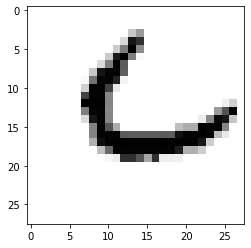

In [22]:
#mnist _ Test
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("MNIST_data/",one_hot=True)

X = tf.placeholder(tf.float32,[None,784])
nb_classes=10
Y = tf.placeholder(tf.float32,[None,nb_classes])

w1 = tf.Variable(tf.random_normal([784,50]),name='weight')
b1 = tf.Variable(tf.random_normal([50]),name='bias')
layer1 = tf.nn.softmax(tf.matmul(X,w1)+b1)

w2 = tf.Variable(tf.random_normal([50,40]),name='weight2')
b2 = tf.Variable(tf.random_normal([40]),name='bias2')
layer2 = tf.nn.softmax(tf.matmul(layer1,w2)+b2)

w3 = tf.Variable(tf.random_normal([40,nb_classes]),name='weight3')
b3 = tf.Variable(tf.random_normal([nb_classes]),name='bias3')
hypothesis = tf.nn.softmax(tf.matmul(layer2,w3)+b3)

cost= tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predict = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(predict,tf.float32))

training_epochs=75
## Layer가 늘어날 수록 Epochs의 크기도 커져야 정확성이 높아진다.
batch_size=100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs , batch_ys = mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost += c / total_batch
        print("Epoch : ","%04d" % (epoch+1),"cost =","{:.9f}".format(avg_cost))

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
    r = random.randint(0,mnist.test.num_examples -1)
    print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap ='Greys',interpolation='nearest')
    plt.show()